<a href="https://colab.research.google.com/github/malekzitouni/-ObjectiX-Intelligent-Object-Detection-ROI-Classification-/blob/main/Flower_Classification_Using_ResNet_50_and_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   **ResNet50**
   - A residual neural network (also referred to as a residual network or ResNet)[1] is a deep learning architecture in which the weight layers learn residual functions with reference to the layer inputs. It was developed in 2015 for image recognition and won that year's ImageNet Large Scale Visual Recognition Challenge
   : allows networks to go much deeper (up to hundreds of layers) while maintaining good training efficiency.
   The main difference in ResNets is that they have
shortcut connections parallel to their normal convolutional
layers. Contrary to convolution layers, these shortcut connections are always alive and the gradients can easily back
propagate through them, which results in a faster training.

   * It is an innovative neural network created for image classification.

The ResNet model architecture allows the training error to be reduced with a deeper network through connection skip.

Residual neural networks ignore some connections and make double or triple layer jumps that contain non-linearities (ReLU)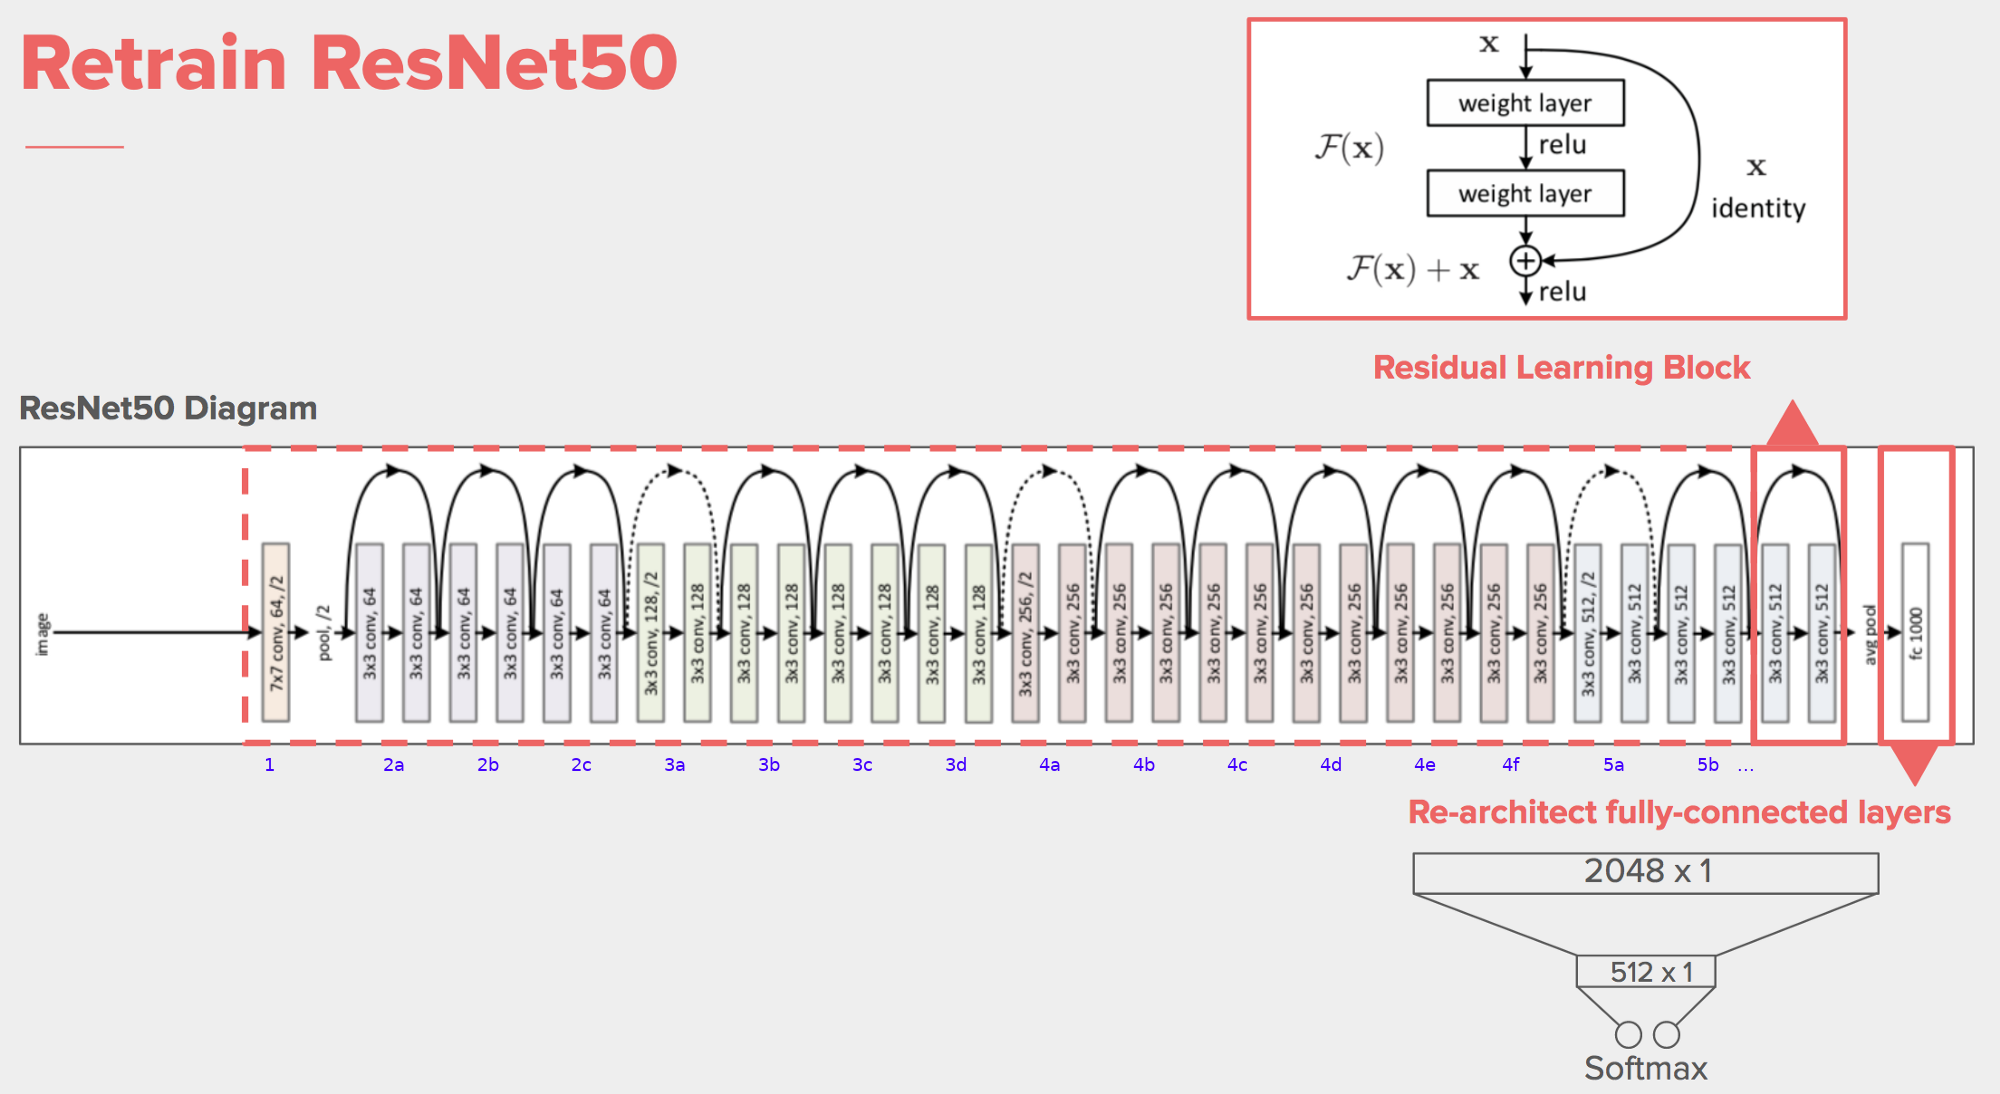.
  

In [3]:
# Import Keras applications module
import keras.applications as apps

# List all available pre-trained models in keras.applications
available_models = [model for model in dir(apps) if callable(getattr(apps, model))]

# Print the available models
for model in available_models:
    print(model)


ConvNeXtBase
ConvNeXtLarge
ConvNeXtSmall
ConvNeXtTiny
ConvNeXtXLarge
DenseNet121
DenseNet169
DenseNet201
EfficientNetB0
EfficientNetB1
EfficientNetB2
EfficientNetB3
EfficientNetB4
EfficientNetB5
EfficientNetB6
EfficientNetB7
EfficientNetV2B0
EfficientNetV2B1
EfficientNetV2B2
EfficientNetV2B3
EfficientNetV2L
EfficientNetV2M
EfficientNetV2S
InceptionResNetV2
InceptionV3
MobileNet
MobileNetV2
MobileNetV3Large
MobileNetV3Small
NASNetLarge
NASNetMobile
ResNet101
ResNet101V2
ResNet152
ResNet152V2
ResNet50
ResNet50V2
VGG16
VGG19
Xception


In [4]:
import torch
import torchvision.models as models

# List all available models in torchvision.models
available_models = [model for model in dir(models) if callable(getattr(models, model))]

# Print the available models
for model in available_models:
    print(model)


AlexNet
AlexNet_Weights
ConvNeXt
ConvNeXt_Base_Weights
ConvNeXt_Large_Weights
ConvNeXt_Small_Weights
ConvNeXt_Tiny_Weights
DenseNet
DenseNet121_Weights
DenseNet161_Weights
DenseNet169_Weights
DenseNet201_Weights
EfficientNet
EfficientNet_B0_Weights
EfficientNet_B1_Weights
EfficientNet_B2_Weights
EfficientNet_B3_Weights
EfficientNet_B4_Weights
EfficientNet_B5_Weights
EfficientNet_B6_Weights
EfficientNet_B7_Weights
EfficientNet_V2_L_Weights
EfficientNet_V2_M_Weights
EfficientNet_V2_S_Weights
GoogLeNet
GoogLeNetOutputs
GoogLeNet_Weights
Inception3
InceptionOutputs
Inception_V3_Weights
MNASNet
MNASNet0_5_Weights
MNASNet0_75_Weights
MNASNet1_0_Weights
MNASNet1_3_Weights
MaxVit
MaxVit_T_Weights
MobileNetV2
MobileNetV3
MobileNet_V2_Weights
MobileNet_V3_Large_Weights
MobileNet_V3_Small_Weights
RegNet
RegNet_X_16GF_Weights
RegNet_X_1_6GF_Weights
RegNet_X_32GF_Weights
RegNet_X_3_2GF_Weights
RegNet_X_400MF_Weights
RegNet_X_800MF_Weights
RegNet_X_8GF_Weights
RegNet_Y_128GF_Weights
RegNet_Y_16GF_We

In [5]:
from torchvision.models import resnet50, ResNet50_Weights

# Load the pre-trained ResNet50 model
model = resnet50(weights=ResNet50_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 34.8MB/s]


In [6]:
# Print all weights (parameters) of the model
for name, param in model.named_parameters():
    print(f"Layer: {name} | Shape: {param.shape} | Weights: {param}")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
         [[ 1.2035e-02,  2.6071e-02,  3.3808e-02],
          [ 2.4973e-02,  2.6865e-02,  1.4035e-03],
          [ 1.0038e-02,  6.0417e-03,  8.2822e-03]],

         [[ 9.2711e-03, -3.4263e-03, -1.0497e-03],
          [ 1.0412e-02, -2.2021e-03,  1.2668e-02],
          [ 5.9654e-03, -1.9872e-02,  3.3715e-03]],

         [[-2.7899e-02, -3.1240e-02, -3.0410e-02],
          [-2.5160e-02, -3.7435e-03, -2.3197e-02],
          [-7.8305e-03, -3.2057e-02, -3.3203e-02]]],


        [[[ 6.5618e-04,  2.6822e-02,  1.3049e-02],
          [ 3.8709e-02,  1.1853e-02, -5.5639e-03],
          [ 1.0657e-02,  6.4248e-03,  7.8097e-03]],

         [[-9.7363e-03, -1.7086e-02, -5.2974e-03],
          [-8.9532e-04,  1.1808e-02,  3.5005e-02],
          [ 2.6174e-02, -1.0677e-02,  1.6593e-02]],

         [[ 8.0774e-03, -3.0466e-02, -2.6236e-02],
          [ 2.5998e-03, -2.4805e-02, -4.8154e-02],
          [ 2.2495e-02, -5.5809e-02, -7.724

In [7]:
# Print the number of nodes in each layer (based on the shape of the weights)
for name, param in model.named_parameters():
    if "weight" in name:  # Focus only on weight parameters
        shape = param.shape

        # For fully connected (Linear) layers, print the input/output node count
        if len(shape) == 2:
            print(f"Layer: {name} | Input Nodes: {shape[1]} | Output Nodes: {shape[0]}")

        # For convolutional layers, print the input/output channels
        elif len(shape) == 4:
            print(f"Layer: {name} | Input Channels: {shape[1]} | Output Channels: {shape[0]}")

Layer: conv1.weight | Input Channels: 3 | Output Channels: 64
Layer: layer1.0.conv1.weight | Input Channels: 64 | Output Channels: 64
Layer: layer1.0.conv2.weight | Input Channels: 64 | Output Channels: 64
Layer: layer1.0.conv3.weight | Input Channels: 64 | Output Channels: 256
Layer: layer1.0.downsample.0.weight | Input Channels: 64 | Output Channels: 256
Layer: layer1.1.conv1.weight | Input Channels: 256 | Output Channels: 64
Layer: layer1.1.conv2.weight | Input Channels: 64 | Output Channels: 64
Layer: layer1.1.conv3.weight | Input Channels: 64 | Output Channels: 256
Layer: layer1.2.conv1.weight | Input Channels: 256 | Output Channels: 64
Layer: layer1.2.conv2.weight | Input Channels: 64 | Output Channels: 64
Layer: layer1.2.conv3.weight | Input Channels: 64 | Output Channels: 256
Layer: layer2.0.conv1.weight | Input Channels: 256 | Output Channels: 128
Layer: layer2.0.conv2.weight | Input Channels: 128 | Output Channels: 128
Layer: layer2.0.conv3.weight | Input Channels: 128 | Outp

In [9]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/dog.JPG'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02110806', 'basenji', 0.99932647), ('n02091244', 'Ibizan_hound', 0.00016836998), ('n02115913', 'dhole', 8.402373e-05)]


In [10]:
!pip install requests
import requests
import torch
import numpy as np
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image

# Load the pre-trained ResNet50 model
model = resnet50(weights=ResNet50_Weights.DEFAULT)


# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path = '/content/dog.JPG'
img = Image.open(img_path)
img = transform(img)  # Apply transformations
img = img.unsqueeze(0)  # Add batch dimension

# Perform prediction
with torch.no_grad():  # Disable gradient calculation
    preds = model(img)
# Apply softmax to get probabilities
probabilities = torch.nn.functional.softmax(preds, dim=1)

# Get the top 3 predicted classes
_, predicted_classes = torch.topk(probabilities, k=3)

# Load class labels (if using ImageNet classes)
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(LABELS_URL).json()

# Print the predicted classes with probabilities
for i in range(3):
    print(f'Predicted: {labels[predicted_classes[0][i]]} with probability: {probabilities[0][predicted_classes[0][i]].item():.4f}')

Predicted: Basenji with probability: 0.0057
Predicted: Ibizan Hound with probability: 0.0027
Predicted: Whippet with probability: 0.0025


In [11]:
print("Raw logits:", preds.shape)
print(preds)
# we have in the output of ResNet50 model 1000 categories so we have 1000 predictions we take topk

Raw logits: torch.Size([1, 1000])
tensor([[ 7.8072e-02,  3.5595e-02,  2.7417e-02,  3.1561e-01,  1.0612e-01,
          1.3244e-01,  1.8768e-03,  5.4649e-02,  1.9921e-01,  1.7375e-02,
         -7.1649e-02, -2.7574e-01, -1.0985e-02,  1.0869e-01, -1.5342e-01,
         -3.6630e-02,  3.6851e-02, -5.6759e-02,  6.7923e-02, -1.4954e-01,
          2.8074e-01,  2.0592e-01,  2.3212e-01,  3.7937e-01,  1.5933e-02,
         -2.1579e-01,  8.3126e-02, -6.2700e-03, -5.2892e-02,  3.0844e-01,
         -7.4151e-02, -1.1722e-01,  1.6056e-02,  5.9544e-02,  1.5946e-01,
          1.9630e-01,  2.1423e-01,  5.0170e-02, -1.4872e-02,  5.2556e-02,
         -3.8383e-02,  2.2233e-01,  2.2035e-02, -1.2485e-01,  1.9088e-01,
          1.4270e-01, -1.5535e-01, -5.7931e-02,  4.6141e-02,  1.4480e-01,
         -9.9978e-02,  1.0830e-01,  1.7180e-01,  3.7729e-02, -1.7564e-03,
         -1.8933e-01, -1.6606e-02, -1.2725e-01, -4.6943e-03, -1.4971e-01,
          1.0166e-01, -1.1006e-01, -1.4433e-01,  3.0624e-02, -4.3936e-02,
    

In [12]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [13]:
import torch
from torchvision.models import resnet50, ResNet50_Weights

# Load the pre-trained ResNet50 model
model = resnet50(weights=ResNet50_Weights.DEFAULT)

# Access layer3.0 block
layer = model.layer3[0]

# Print the layer's weight and bias parameters
for name, param in layer.named_parameters():
    print(f'Layer: {name} | Shape: {param.shape}')
    print(param)  # This prints the full tensor of weights/biases


Layer: conv1.weight | Shape: torch.Size([256, 512, 1, 1])
Parameter containing:
tensor([[[[-0.1216]],

         [[ 0.0158]],

         [[-0.0331]],

         ...,

         [[ 0.0240]],

         [[-0.1957]],

         [[ 0.0281]]],


        [[[ 0.0350]],

         [[-0.0149]],

         [[ 0.0323]],

         ...,

         [[-0.0422]],

         [[-0.0044]],

         [[-0.0568]]],


        [[[-0.0928]],

         [[-0.0036]],

         [[ 0.0058]],

         ...,

         [[ 0.1036]],

         [[-0.0469]],

         [[ 0.0380]]],


        ...,


        [[[ 0.0766]],

         [[ 0.0815]],

         [[-0.0272]],

         ...,

         [[-0.0078]],

         [[ 0.0350]],

         [[-0.0237]]],


        [[[ 0.0121]],

         [[-0.0073]],

         [[-0.0072]],

         ...,

         [[-0.0066]],

         [[-0.0436]],

         [[-0.0483]]],


        [[[-0.0221]],

         [[-0.0010]],

         [[ 0.0519]],

         ...,

         [[ 0.0202]],

         [[-0.0093]],



In [17]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Feature Map 1 Values:
[[ 0.07140657  0.14655189  0.09254767 ... -0.09027513 -0.05510072
   0.2916572 ]
 [ 0.04190916  0.02944955  0.07517891 ... -0.01825631 -0.00782557
   0.05351342]
 [-0.00580268 -0.05344408 -0.04990213 ... -0.07366368 -0.03731475
   0.0609524 ]
 ...
 [-1.0285009  -1.7231606  -1.7513137  ... -2.7747924  -2.5992067
  -2.2211342 ]
 [ 1.267369    1.8160188   2.0743423  ...  2.499887    2.5304666
   1.8750831 ]
 [ 0.5767577   0.9429068   1.1656201  ...  0.99180335  1.086633
   0.79761577]]

Feature Map 2 Values:
[[ 1.4657406   1.0927192   0.6662285  ... -0.23224433 -0.21293072
  -0.16245353]
 [ 1.6148934   1.2272063   0.6303647  ... -0.52153856 -0.49992564
  -0.38405433]
 [ 1.6772659   1.2772592   0.6571104  ... -0.4627811  -0.4111187
  -0.23061532]
 ...
 [ 0.9350462   1.144152    0.75852644 ...  2.5301185   2.360719
   2.7017763 ]
 [ 0.57935256  0.8602047   0.6870483  ...  1.8657931   1.7762338
   2.0222685 ]
 [-0.8906058  -0.96267265 -1.0312152  ... -0.94688493 -0.9705

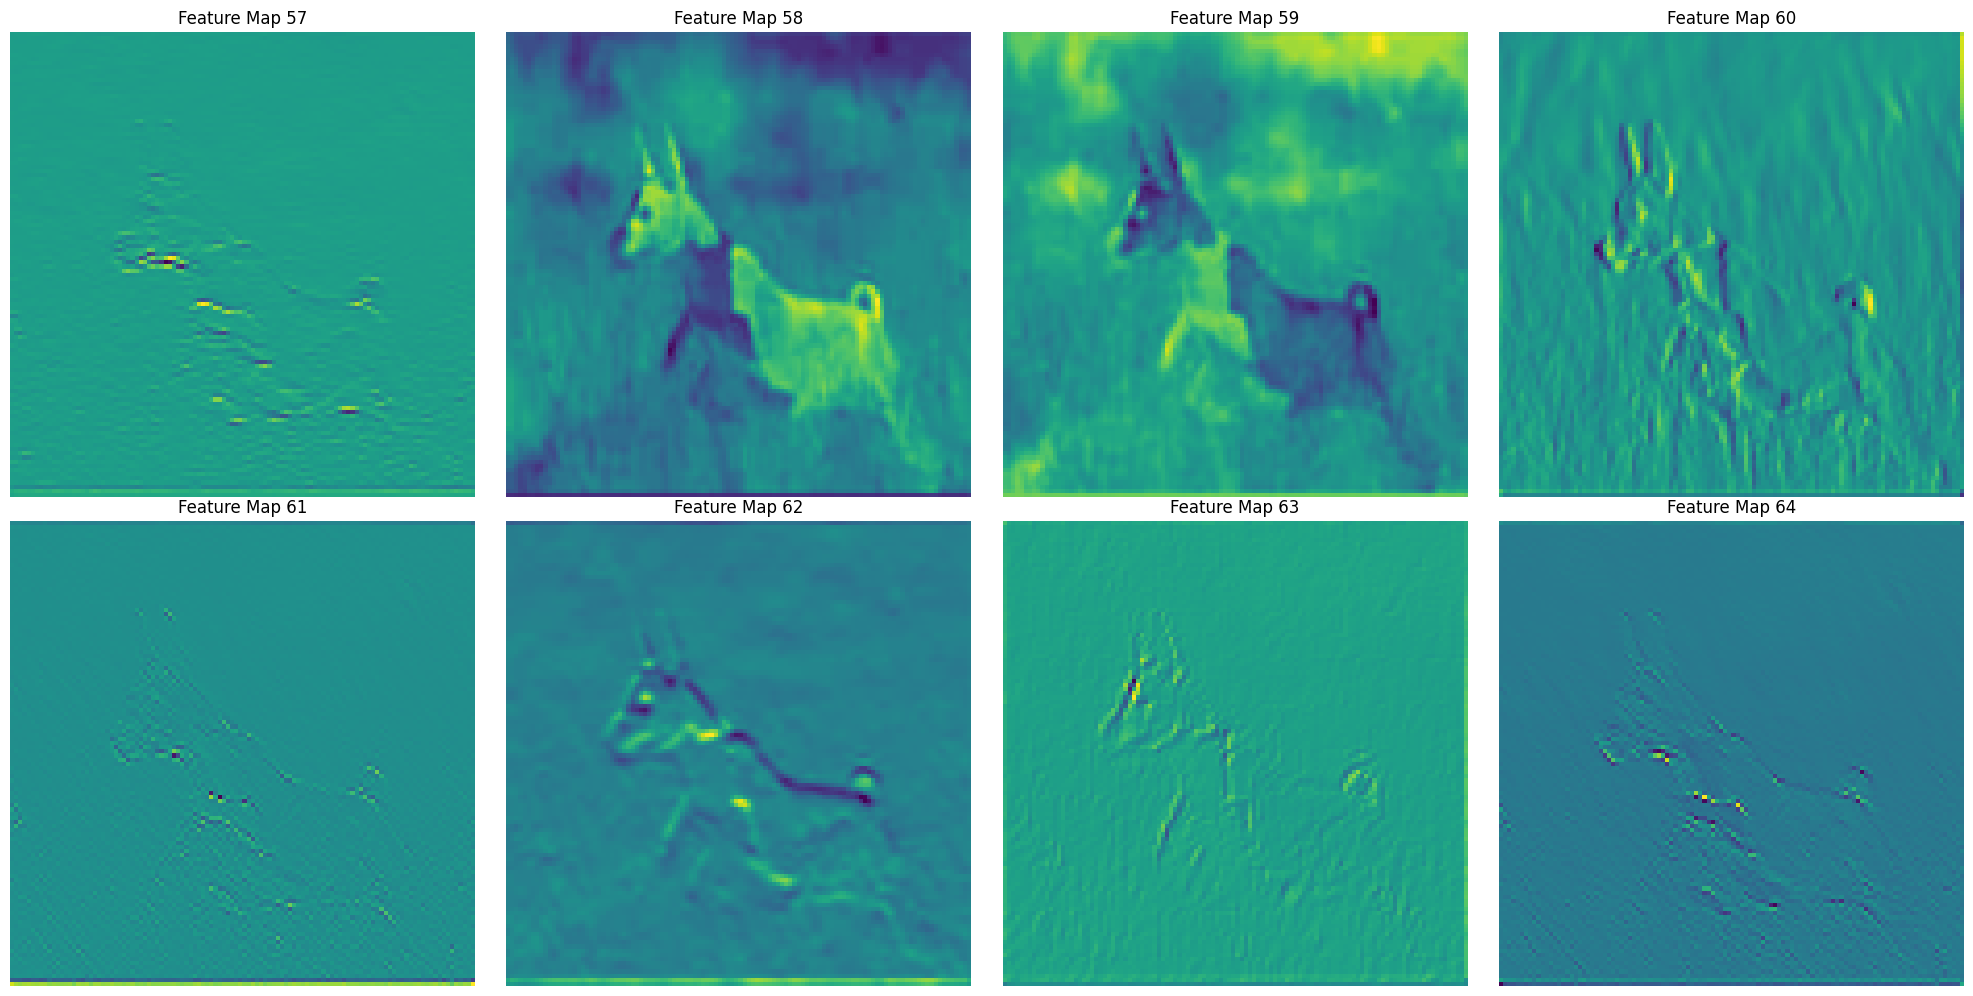

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image
# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_path='/content/dog.JPG'
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Extract features from the conv1 layer
with torch.no_grad():
    conv1_output = model.conv1(img_tensor)


# Select the last 8 feature maps
feature_maps = conv1_output[0]  # Remove batch dimension
last_to_show = feature_maps[-8:]  # Select the last 8 feature maps

# Print the values of the last 8 feature maps
for i in range(last_to_show.shape[0]):
    print(f'Feature Map {i + 1} Values:')
    print(last_to_show[i].cpu().numpy())  # Convert to NumPy array for easier reading
    print()  # New line for better readability
plt.figure(figsize=(20, 10))
for i in range(last_to_show.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(last_to_show[i].cpu().numpy(), cmap='viridis')
    plt.axis('off')
    plt.title(f'Feature Map {64 - 8 + i + 1}')  # Label with the actual map number

plt.tight_layout()
plt.show()

Output of the last residual block in layer1:
torch.Size([1, 256, 56, 56])
[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [8.6279172e-01 1.0523317e+00 7.4067950e-01 ... 1.4786359e+00
    2.4655967e+00 2.8733349e+00]
   [9.1039819e-01 5.2752483e-01 7.6473969e-01 ... 1.6359470e+00
    2.3483596e+00 2.4336505e+00]
   ...
   [0.0000000e+00 4.7321406e-01 4.5474777e-01 ... 2.4505459e-02
    0.0000000e+00 1.2632283e+00]
   [4.7610223e-02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 5.2733374e-01]
   [0.0000000e+00 5.7135808e-01 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]]

  [[1.1973469e+00 7.5021076e-01 1.5918947e+00 ... 0.0000000e+00
    1.0007451e+00 1.6930684e+00]
   [1.9800210e+00 1.0220367e+00 1.5146490e+00 ... 3.2304704e-01
    1.7717421e+00 2.0335114e+00]
   [1.2872581e+00 1.3149194e+00 9.9567026e-01 ... 2.5180316e-01
    1.9270788e+00 1.8646489e+00]
   ...
   [3.4023352e+00 1.4922609e+00 2.687

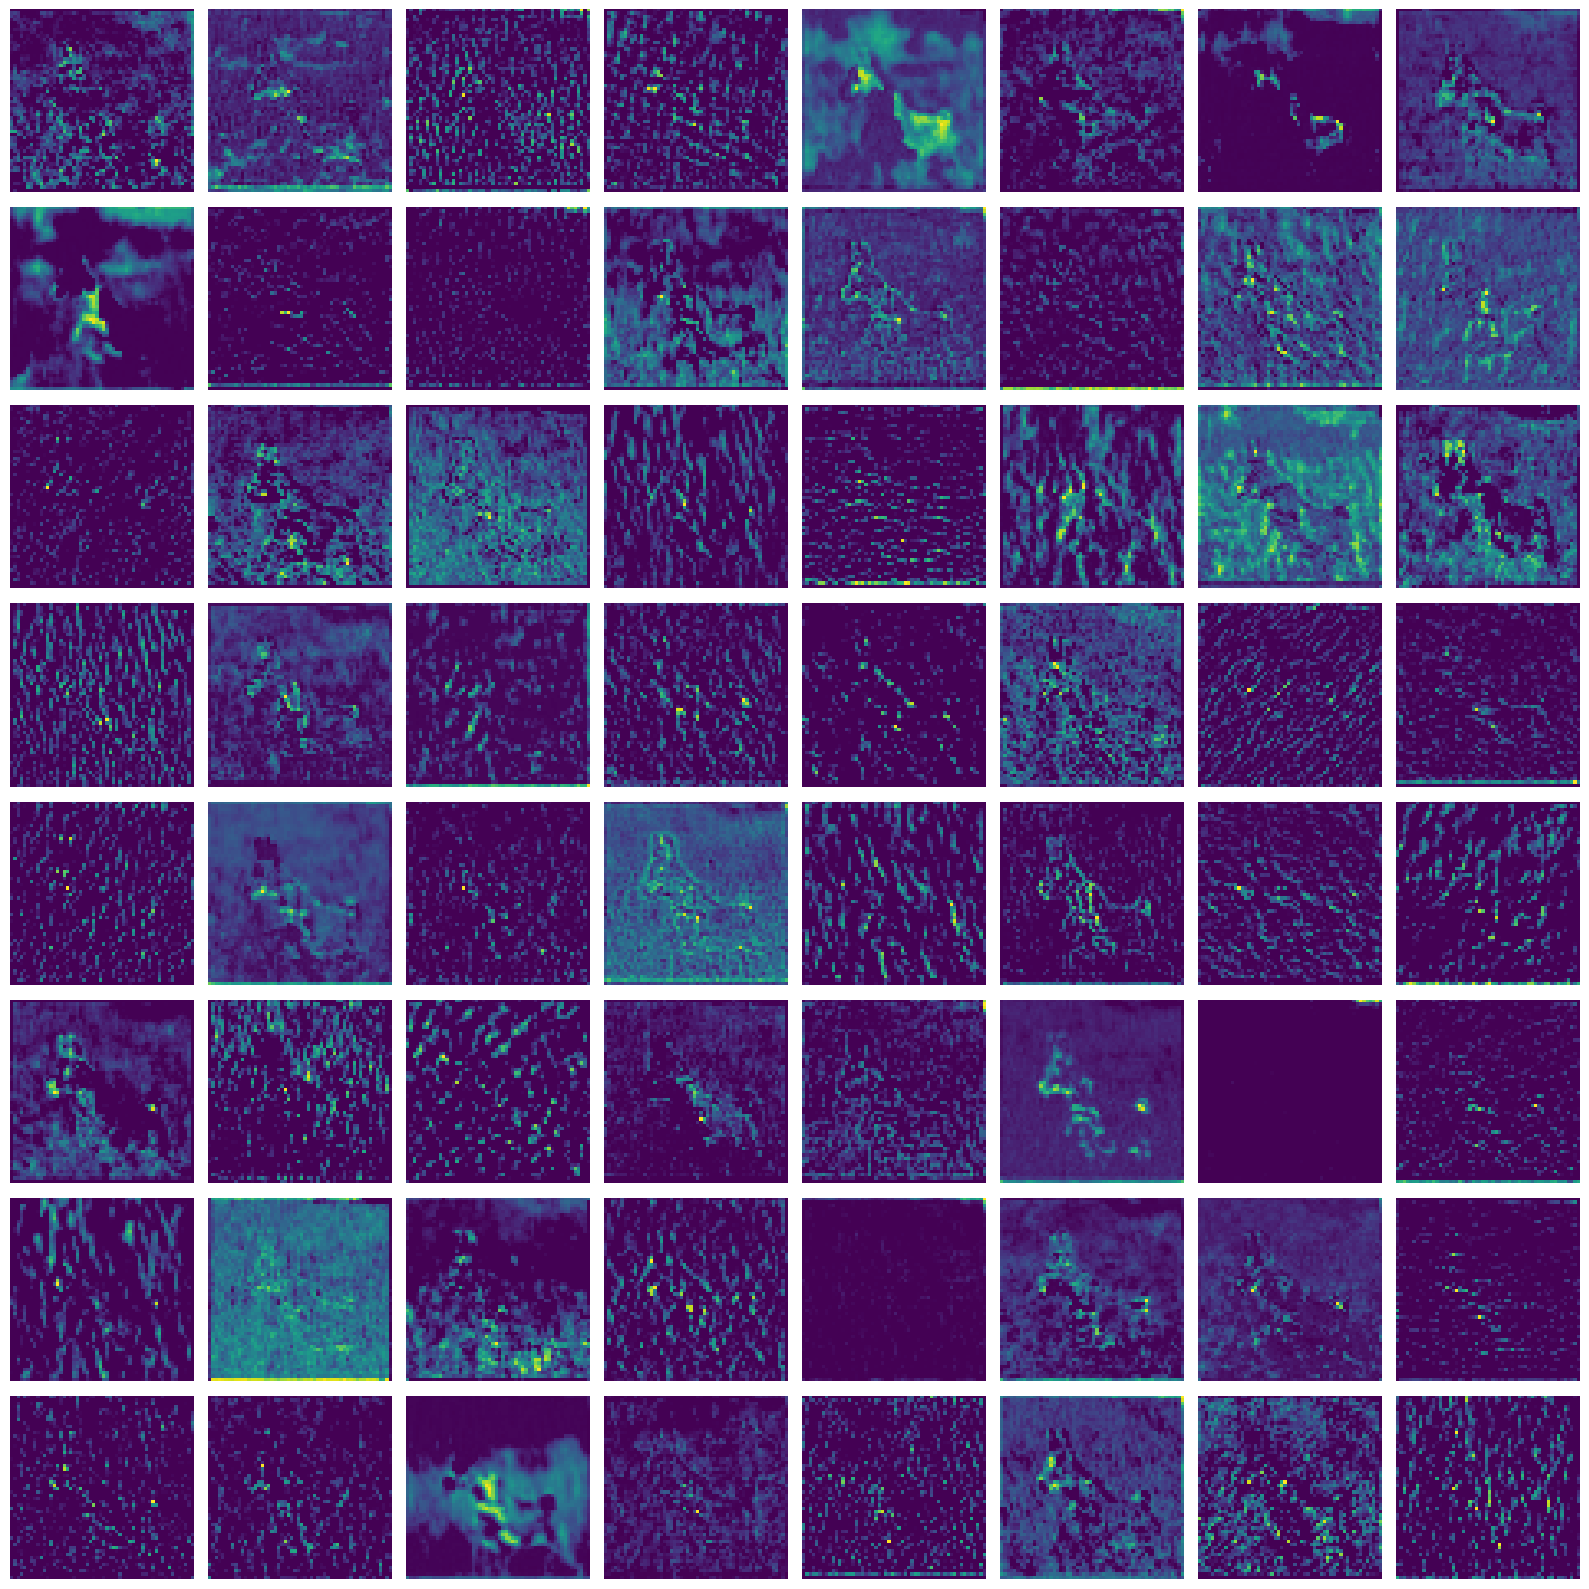

In [21]:
# Forward pass through initial layers
with torch.no_grad():
    x = model.conv1(img_tensor)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    # Pass through all blocks in layer1 (stage 1)
    for block in model.layer1:
        x = block(x)

# x now contains the output of the last residual block in layer1
print('Output of the last residual block in layer1:')
print(x.shape)  # Print the shape of the output tensor
print(x.data.cpu().numpy())  # Print the values (this can be large)

# x now contains the output of the last residual block in layer1
# Extracting the feature maps
feature_maps = x.squeeze(0)  # Remove the batch dimension
num_feature_maps = feature_maps.size(0)

# Set up the figure for plotting
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.flatten()

# Visualize the first 64 feature maps
for i in range(64):
    ax = axes[i]
    ax.imshow(feature_maps[i].cpu().numpy(), cmap='viridis')
    ax.axis('off')

plt.tight_layout()
plt.show()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 33.2MB/s]


Output of the last residual block in layer 4:
torch.Size([1, 1024, 14, 14])


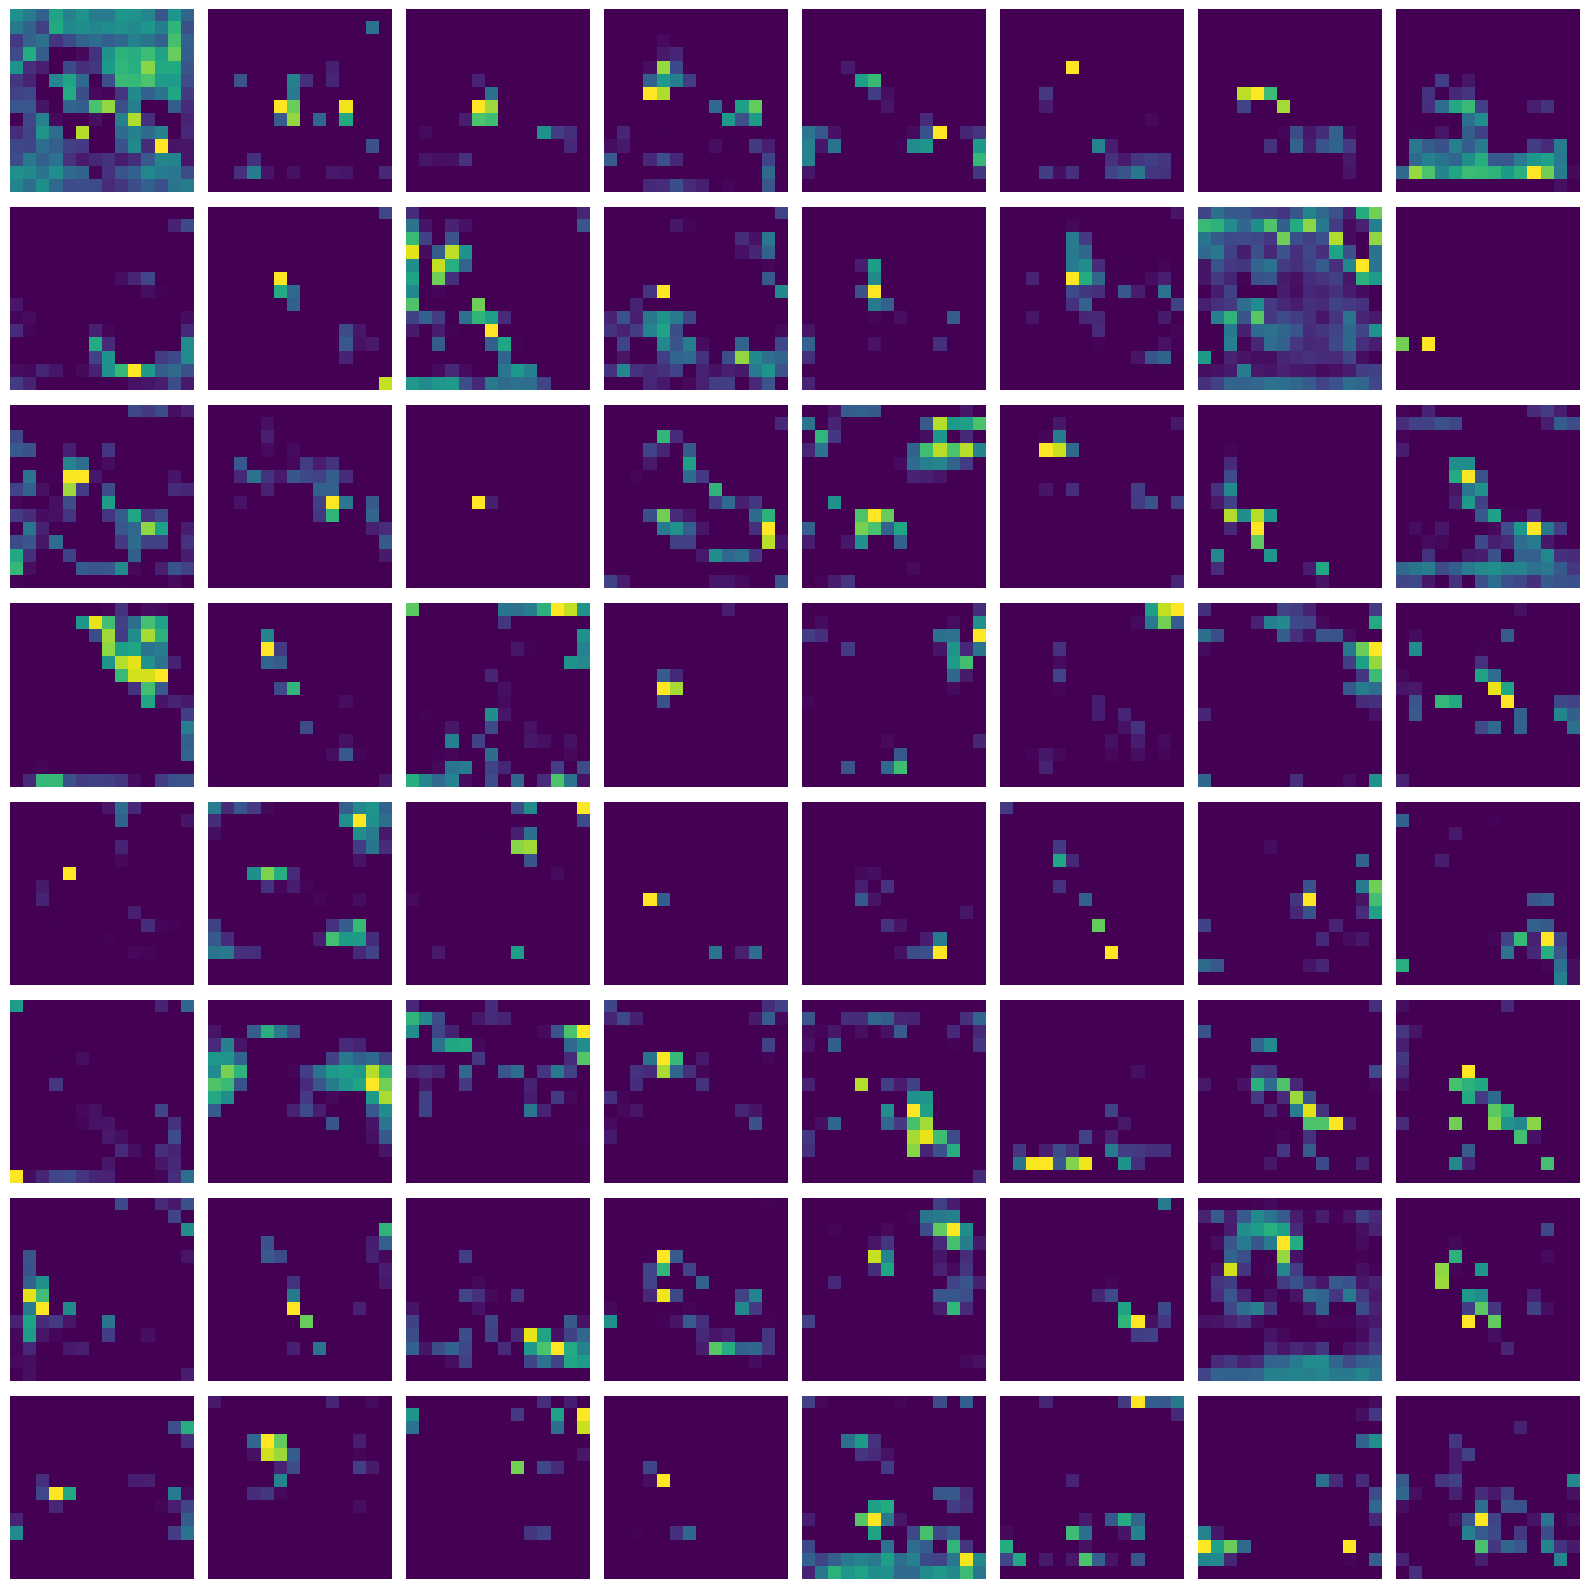

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image

# Load the pre-trained ResNet50 model
model = resnet50(weights='IMAGENET1K_V1')
model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path = '/content/dog.JPG'  # Replace with your image path
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Forward pass through initial layers and the first three stages
with torch.no_grad():
    x = model.conv1(img_tensor)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    # Pass through layer 1
    for block in model.layer1:
        x = block(x)

    # Pass through layer 2
    for block in model.layer2:
        x = block(x)

    # Pass through layer 3
    for block in model.layer3:
        x = block(x)




# x now contains the output of the last residual block in layer 4
print('Output of the last residual block in layer 4:')
print(x.shape)  # Print the shape of the output tensor

# Extracting the feature maps
feature_maps = x.squeeze(0)  # Remove the batch dimension
num_feature_maps = feature_maps.size(0)

# Set up the figure for plotting
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.flatten()

# Visualize the first 64 feature maps
for i in range(min(64, num_feature_maps)):  # Ensure we don't exceed available feature maps
    ax = axes[i]
    ax.imshow(feature_maps[i].cpu().numpy(), cmap='viridis')
    ax.axis('off')

plt.tight_layout()
plt.show()


Output of the last residual block in layer 4:
torch.Size([1, 2048, 7, 7])


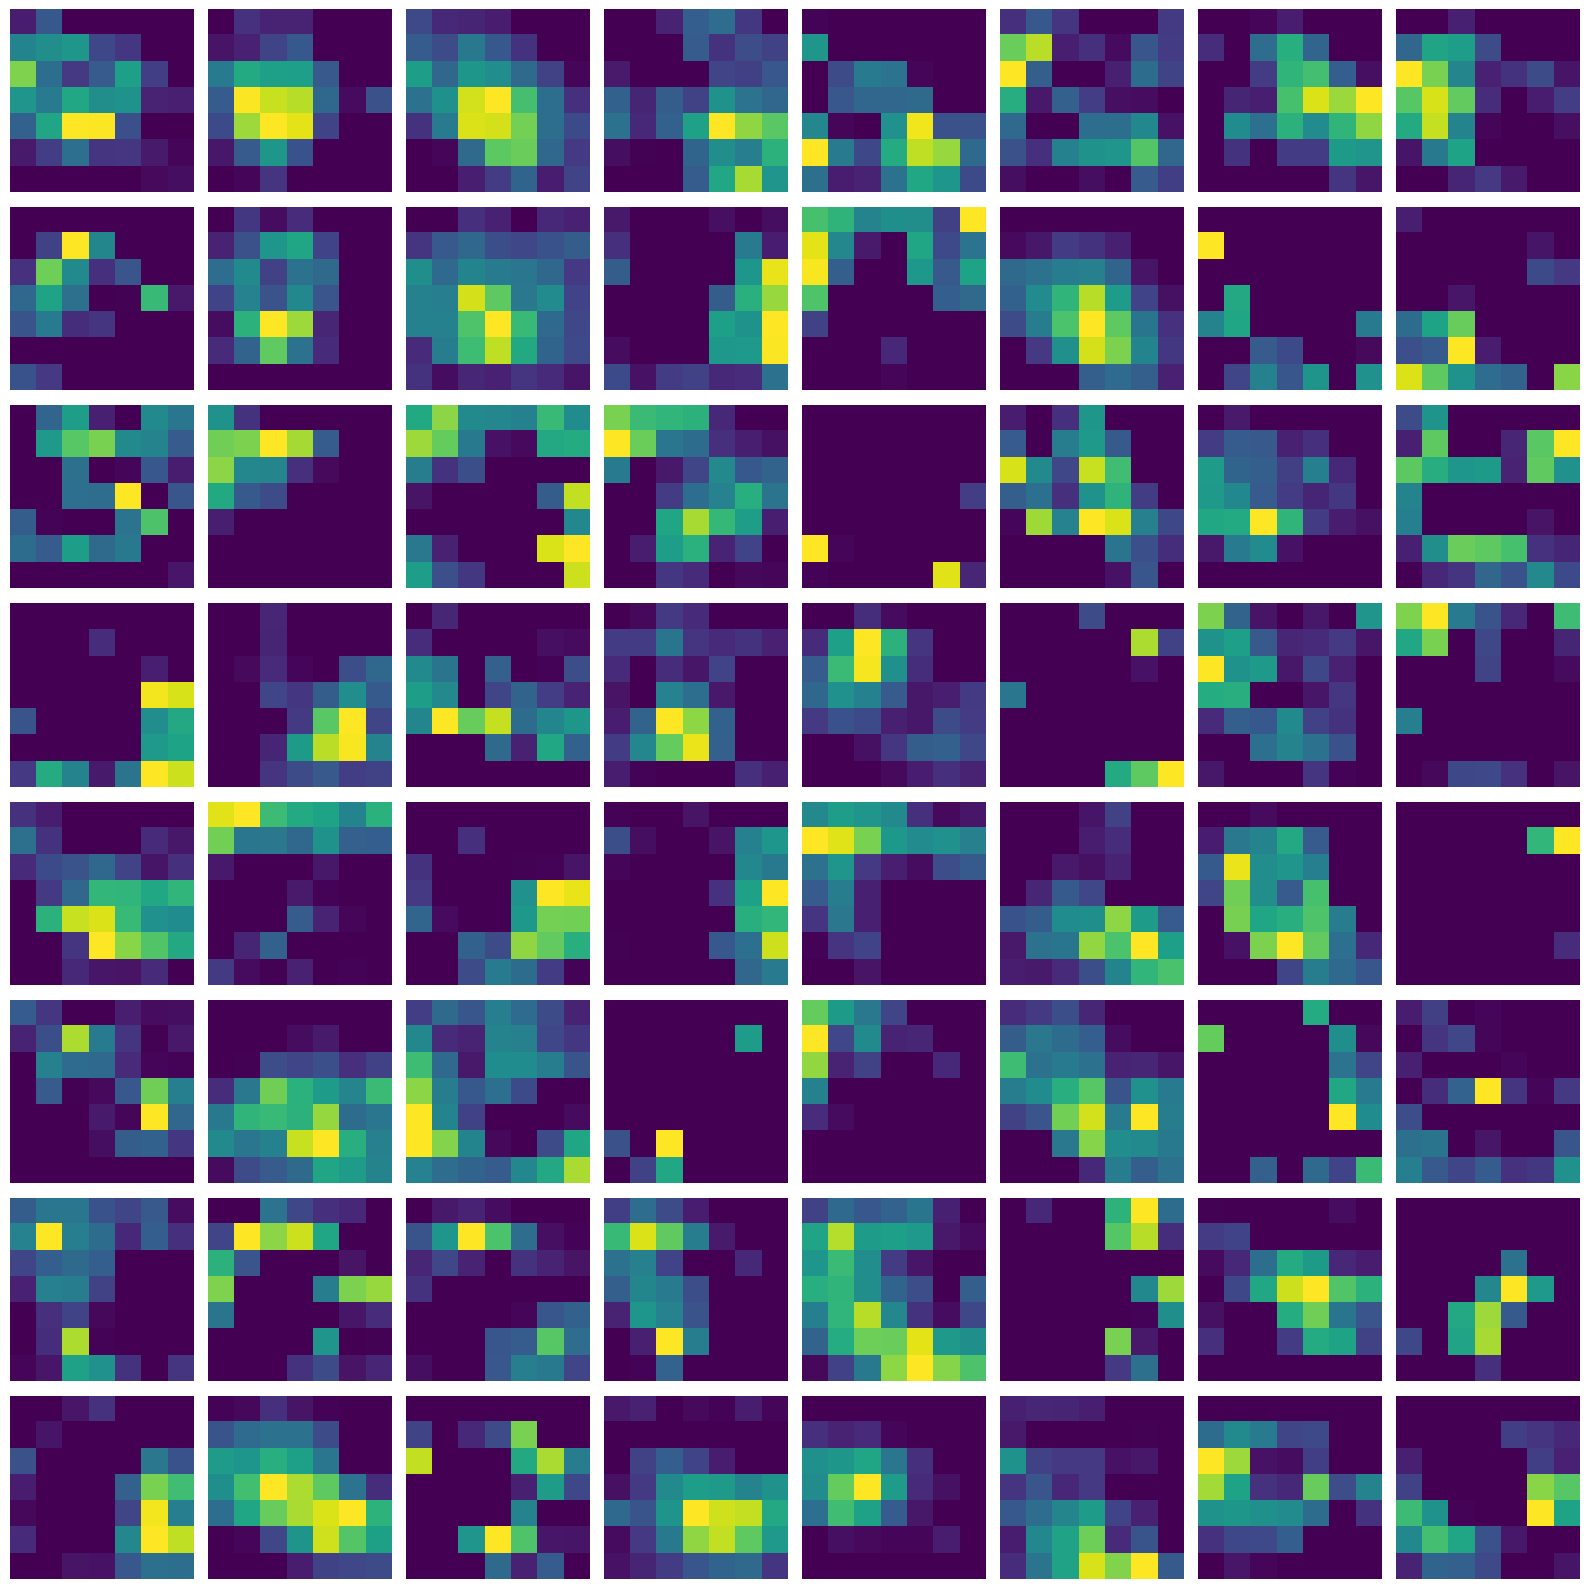

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image

# Load the pre-trained ResNet50 model
model = resnet50(weights='IMAGENET1K_V1')
model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path = '/content/dog.JPG'  # Replace with your image path
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Forward pass through initial layers and the first three stages
with torch.no_grad():
    x = model.conv1(img_tensor)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    # Pass through layer 1
    for block in model.layer1:
        x = block(x)

    # Pass through layer 2
    for block in model.layer2:
        x = block(x)

    # Pass through layer 3
    for block in model.layer3:
        x = block(x)


   # Pass through layer 3
    for block in model.layer4:
        x = block(x)
# x now contains the output of the last residual block in layer 4
print('Output of the last residual block in layer 4:')
print(x.shape)  # Print the shape of the output tensor

# Extracting the feature maps
feature_maps = x.squeeze(0)  # Remove the batch dimension
num_feature_maps = feature_maps.size(0)

# Set up the figure for plotting
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.flatten()

# Visualize the first 64 feature maps
for i in range(min(64, num_feature_maps)):  # Ensure we don't exceed available feature maps
    ax = axes[i]
    ax.imshow(feature_maps[i].cpu().numpy(), cmap='viridis')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image
import requests

# Load the pre-trained ResNet50 model
model = resnet50(weights='IMAGENET1K_V1')
model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path = '/content/dog.JPG'  # Replace with your image path
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Forward pass through the model
with torch.no_grad():
    x = model.conv1(img_tensor)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    # Pass through layer 1
    for block in model.layer1:
        x = block(x)

    # Pass through layer 2
    for block in model.layer2:
        x = block(x)

    # Pass through layer 3
    for block in model.layer3:
        x = block(x)

    # Pass through layer 4
    for block in model.layer4:
        x = block(x)

    # Average Pooling
    x = model.avgpool(x)

    # Flatten the output for the fully connected layer
    x = torch.flatten(x, 1)  # Flatten to (batch_size, num_features)

    # Fully connected layer
    x = model.fc(x)

# Output of the fully connected layer
print('Output of the fully connected layer:')
print(x.shape)  # Print the shape of the output tensor

# Apply softmax to get probabilities
probabilities = torch.softmax(x, dim=1)

# Get the top 5 predicted classes and their probabilities
top_probs, top_classes = torch.topk(probabilities, k=5)

# Load class labels (ImageNet)
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(LABELS_URL).json()

# Print the top predicted classes and their probabilities
for i in range(top_probs.size(1)):
    print(f"Predicted: {labels[top_classes[0][i]]} with probability: {top_probs[0][i].item():.4f}")





Output of the fully connected layer:
torch.Size([1, 1000])
Predicted: Basenji with probability: 0.9995
Predicted: toy terrier with probability: 0.0001
Predicted: dingo with probability: 0.0001
Predicted: Pembroke Welsh Corgi with probability: 0.0001
Predicted: Ibizan Hound with probability: 0.0000


* **Transfer Learning**

-If a model is trained on a database, there is no need to re-train the model from scratch to fit a new set of similar data.
* saving resources
* improving efficiency
* model training facilitation
* saving time
-The task is to transfer the learning from a ResNet50, trained with Imagenet dataset, to a model that classifies flower images
 -Transfer learning is a machine learning technique where a model trained on one task is reused or fine-tuned for a different but related task. Instead of training a new model from scratch, transfer learning leverages the knowledge gained from a pre-trained model, allowing it to achieve better performance with less data and computation on the new task. This approach is especially effective when the new task has limited labeled data.


-To show how Transfer Learning can be useful, ResNet50 will be trained on a custom dataset.
  * USE CASE: Flower Classification
  * Flower types - daisy, dandelion, roses, sunflowers, tulips
  * To classify flower images, the Flower Classification dataset will be used. It is available on Kaggle.


In [2]:
# python librairies installation
!pip install split-folders matplotlib opencv-python spicy

To show how Transfer Learning can be useful, ResNet50 will be trained on a custom dataset.


**USE CASE: Flower Classification**   
   -To classify flower images, the Flower Classification dataset will be used. It is available on Kaggle.



The dataset contains 5 types of flowers:

*daisy

*dandelion

*roses

*sunflowers

*tulips

**Step 1 - Librairies installation and import**

In [3]:
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

**Step 2 - Data preprocessing**

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import splitfolders


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os
input_folder = '/content/drive/MyDrive/flower_photos'
# Check if the folder exists
if os.path.isdir(input_folder):
    print("Input folder exists.")
else:
    print("Input folder does not exist.")


Input folder exists.


In [7]:
import splitfolders
import os

# Define input and output paths
input_folder = '/content/drive/MyDrive/flower_photos'  # Path to your dataset
output_folder = '/content/drive/MyDrive/data-split'     # Path where the split will be saved

# Check if the input folder exists
if os.path.isdir(input_folder):
    print("Input folder exists.")
else:
    print("Input folder does not exist.")

# Split the dataset
splitfolders.ratio(
    input_folder,        # Input folder
    output_folder,       # Output folder
    ratio=(0.7, 0.2, 0.1),  # Train, validation, test ratio
    seed=1337            # Seed for reproducibility
)

print("Dataset split completed.")


Input folder exists.


Copying files: 118 files [01:46,  1.48 files/s]

KeyboardInterrupt: 

In [8]:
datagen = ImageDataGenerator()
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']
# training data
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/data-split/train",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 2934 images belonging to 5 classes.


In [9]:
import os
import numpy as np

# Define class names and mapping
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
class_dict = {class_name: idx for idx, class_name in enumerate(class_names)}

# Path to the image
img_path = '/content/drive/MyDrive/data-split/train/tulips/10163955604_ae0b830975_n.jpg'

# Extract class label from the path
class_label = os.path.basename(os.path.dirname(img_path))

# Get the class index
class_index = class_dict[class_label]

# Create a one-hot encoded vector for the class
label_vector = np.zeros(len(class_names))
label_vector[class_index] = 1

# Print the label vector
print(f"Class label: {class_label}")
print(f"One-hot encoded vector: {label_vector}")




Class label: tulips
One-hot encoded vector: [0. 0. 0. 0. 1.]


In [10]:
valid_generator = ImageDataGenerator()
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']
# training data
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/data-split/val",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 454 images belonging to 5 classes.


In [11]:
test_generator = ImageDataGenerator()
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']
# training data
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/data-split/test",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 372 images belonging to 5 classes.


In [12]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False
#This prevents the pre-trained layers from changing, allowing the model to use pre-learned features and focus on learning the new custom classification task with fewer parameters.

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


**Build The custom model for a classification task using the pre-trained ResNet50 model as a Base**

In [13]:
x = resnet_50.output
# Building the Custom Model
x = layers.GlobalAveragePooling2D()(x)
# A fully connected layer with 512 neurons and ReLU activation (which helps the network learn non-linear features).
x = layers.Dense(256, activation='relu')(x)
# This is a regularization layer, which randomly drops 50% of neurons during each update cycle.
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# The softmax activation function is used to generate a probability distribution over the 5 classes.
predictions = layers.Dense(5, activation='softmax')(x)
# Each neuron represents the probability that the input image belongs to a particular class. The class with the highest probability will be the model's prediction.
model = Model(inputs = resnet_50.input, outputs = predictions)

In [14]:
#define training function
def trainModel(model, epochs, optimizer):
    batch_size = 64
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [22]:
import os

# Path to the corrupted file
corrupted_file_path = "/content/drive/MyDrive/data-split/train/dandelion/2476098674_e6f39536f5_n.jpg"

# Remove the file
if os.path.exists(corrupted_file_path):
    os.remove(corrupted_file_path)
    print(f"Deleted: {corrupted_file_path}")
else:
    print("File not found")


File not found


In [23]:
!pip install pillow
!pip install tensorflow-io

import tensorflow_io as tfio
import os

# Directory containing images
image_dir = '/content/drive/MyDrive/data-split/train'

# Iterate through subdirectories and images
for subdir, _, files in os.walk(image_dir):
    for file in files:
        file_path = os.path.join(subdir, file)

        try:
            # Attempt to decode the image
            image = tfio.image.decode_image(tf.io.read_file(file_path))
        except Exception as e:
            print(f"Corrupted image: {file_path}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 20.3 MB/s eta 0:00:00
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/4042180234_64cd2859c9_m.jpg
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/17165583356_38cb1f231d_n.jpg
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/8562853756_73778dac25_n.jpg
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/5208680166_c4372477ef_n.jpg
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/7002703410_3e97b29da5_n.jpg
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/3150964108_24dbec4b23_m.jpg
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/3511776685_3635087b12_n.jpg
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/14053292975_fdc1093571_n.jpg
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/489506904_9b68ba211c.jpg
Corrupted image: /content/drive/MyDrive/data-split/train/tulips/4624404489_11e10fcd33_n.jpg
Co

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values to [0,1]
    shear_range=0.2,             # Apply random shear transformations
    zoom_range=0.2,              # Apply random zoom
    horizontal_flip=True         # Randomly flip images horizontally
)

# Define the data augmentation for the validation set (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Create the training generator using the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/data-split/train',  # Path to training data
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical'  # Categorical since it's a multi-class classification
)

# Create the validation generator using the ImageDataGenerator
valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/data-split/val',  # Path to validation data
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'  # Categorical since it's a multi-class classification
)

# Define your model and train function as before:
model_history = trainModel(model=model, epochs=10, optimizer="Adam")


Found 2933 images belonging to 5 classes.
Found 454 images belonging to 5 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/92 ━━━━━━━━━━━━━━━━━━━━ 1:20 5s/step - accuracy: 0.2767 - loss: 1.5969

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e205f48a2a0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 260, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 253, in generator_fn
    yield self.py_dataset[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3498, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e205f48a2a0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e205f48a2a0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 260, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 253, in generator_fn
    yield self.py_dataset[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3498, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e205f48a2a0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_42559]